In [1]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


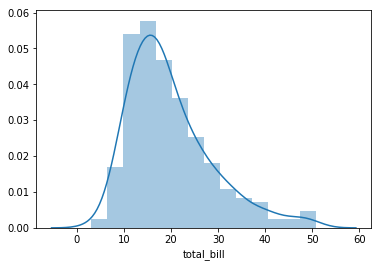

In [29]:
sns.distplot(tips['total_bill'])

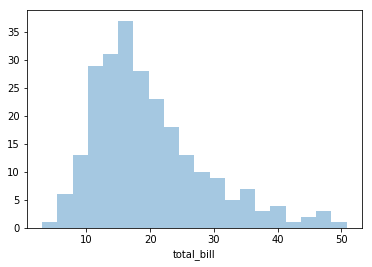

In [30]:
sns.distplot(tips['total_bill'], kde = False, bins=20)

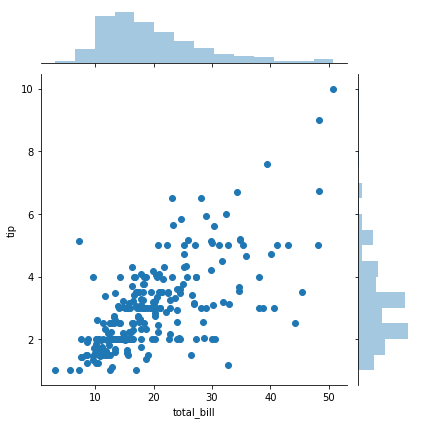

In [31]:
sns.jointplot(x='total_bill',y='tip',data=tips)

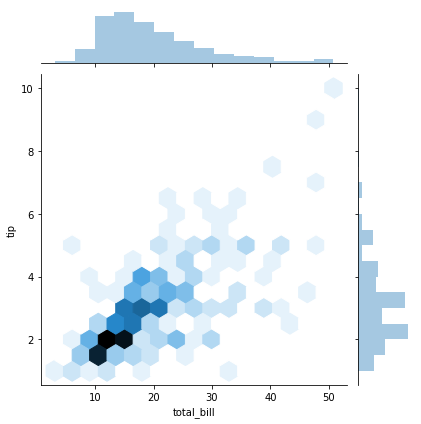

In [32]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

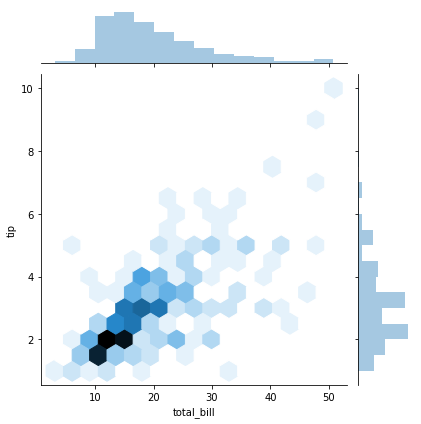

In [33]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

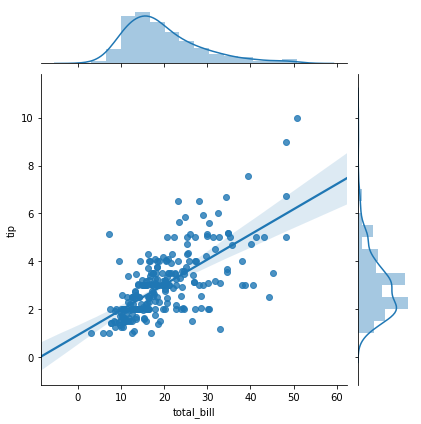

In [34]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

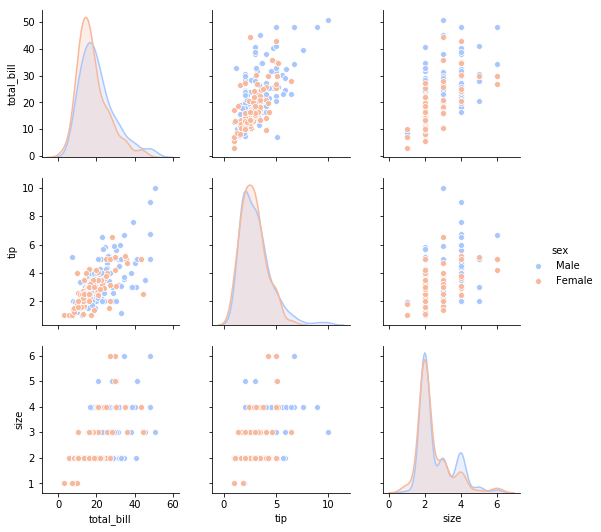

In [37]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

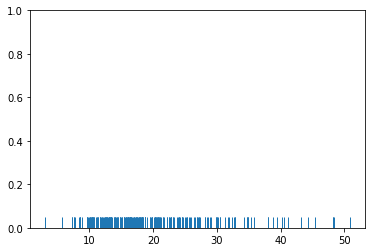

In [38]:
sns.rugplot(tips['total_bill'])

(0, 1)

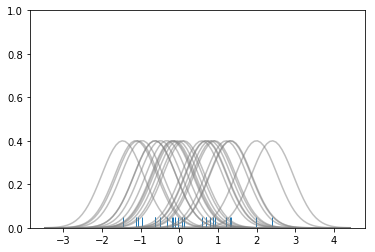

In [39]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

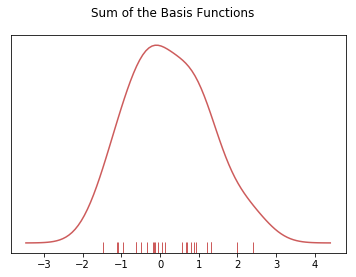

In [40]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


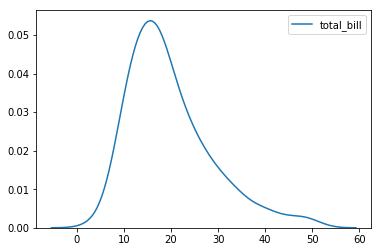

In [41]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


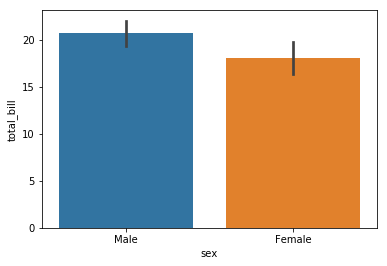

In [54]:
sns.barplot(x='sex', y='total_bill', data=tips)

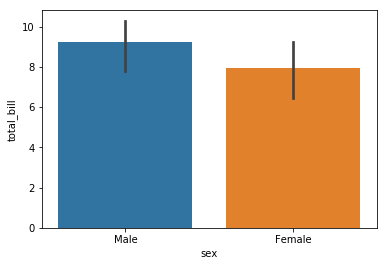

In [53]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

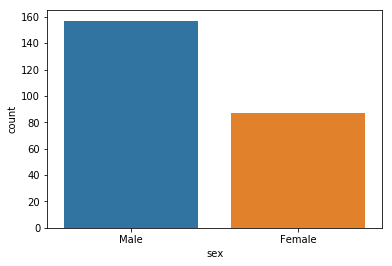

In [55]:
sns.countplot(x='sex', data=tips)

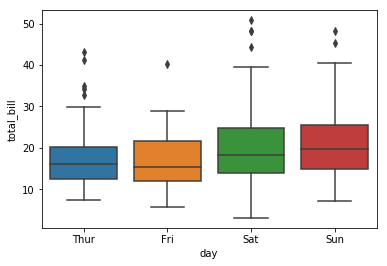

In [56]:
sns.boxplot(x='day', y='total_bill', data=tips)

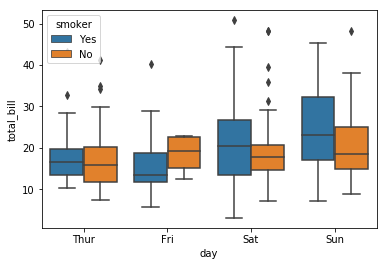

In [57]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

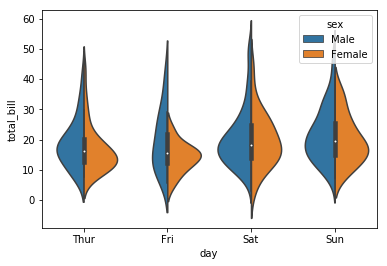

In [62]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

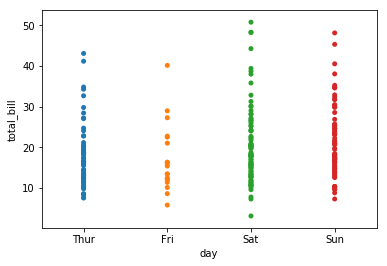

In [65]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=False)

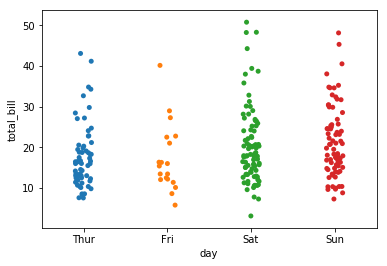

In [66]:
sns.stripplot(x='day',y='total_bill',data=tips)

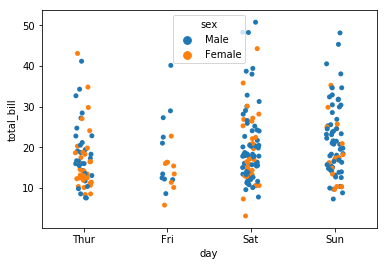

In [67]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


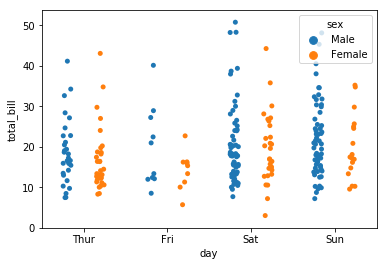

In [68]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


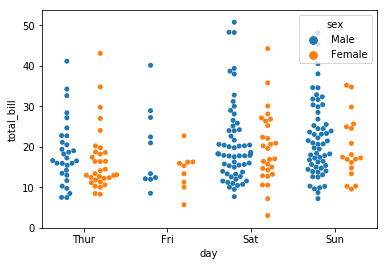

In [69]:
sns.swarmplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


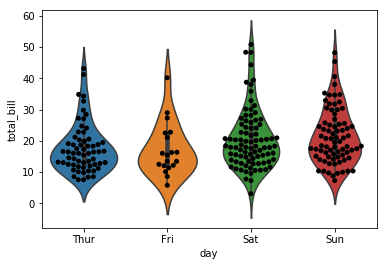

In [75]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

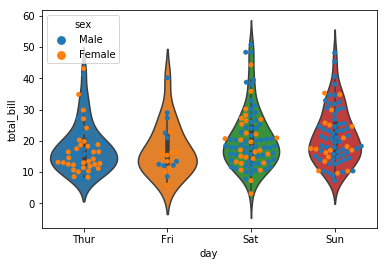

In [74]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, hue='sex')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


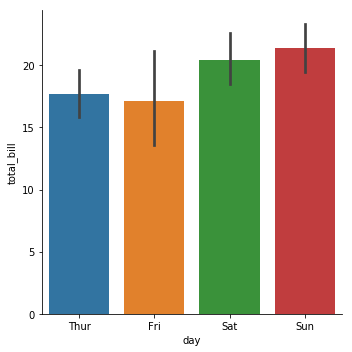

In [80]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='bar')

# Matrix Plot - Heat Map and Clustering

In [102]:
flights = sns.load_dataset('flights')

In [82]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [83]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [84]:
tc = tips.corr()

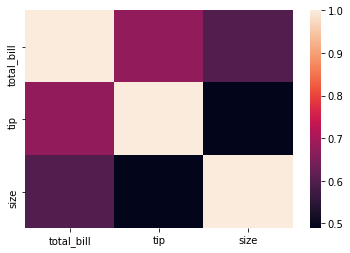

In [85]:
sns.heatmap(tc)

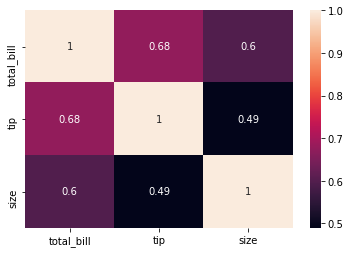

In [86]:
sns.heatmap(tc, annot=True)

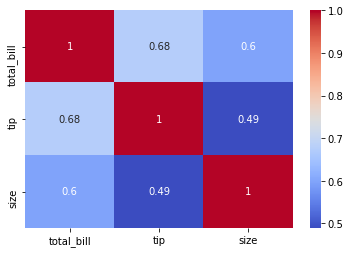

In [87]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [90]:
flights.pivot_table(index='month', columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [91]:
fp = flights.pivot_table(index='month', columns='year',values='passengers')

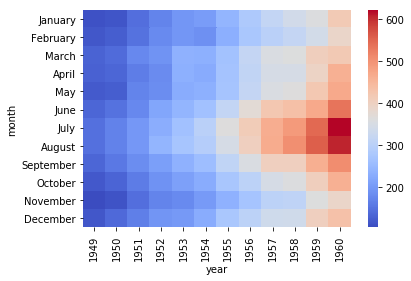

In [93]:
sns.heatmap(fp, cmap='coolwarm')

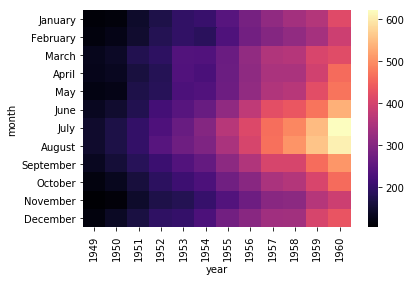

In [94]:
sns.heatmap(fp, cmap='magma')

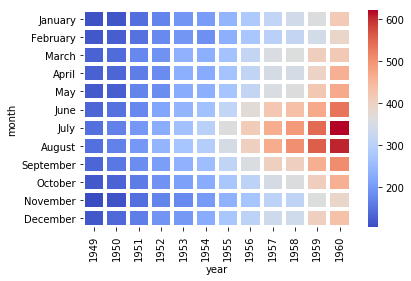

In [98]:
sns.heatmap(fp, cmap='coolwarm',linecolor='white',linewidths=3)

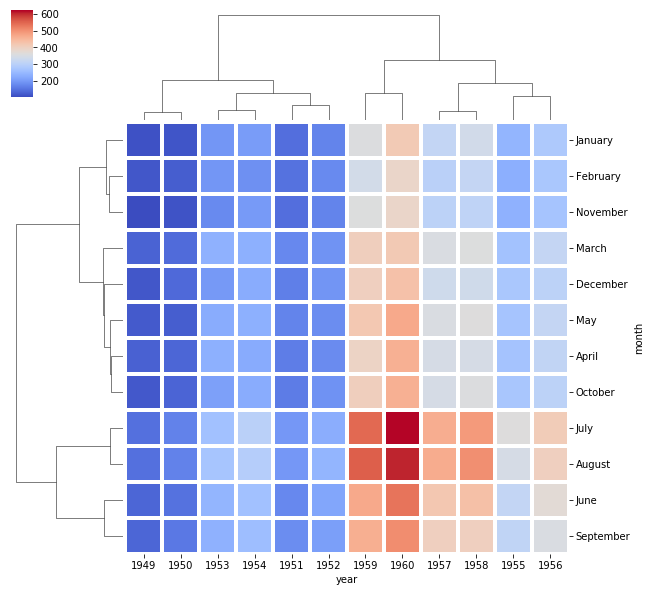

In [99]:
sns.clustermap(fp, cmap='coolwarm',linecolor='white',linewidths=3)

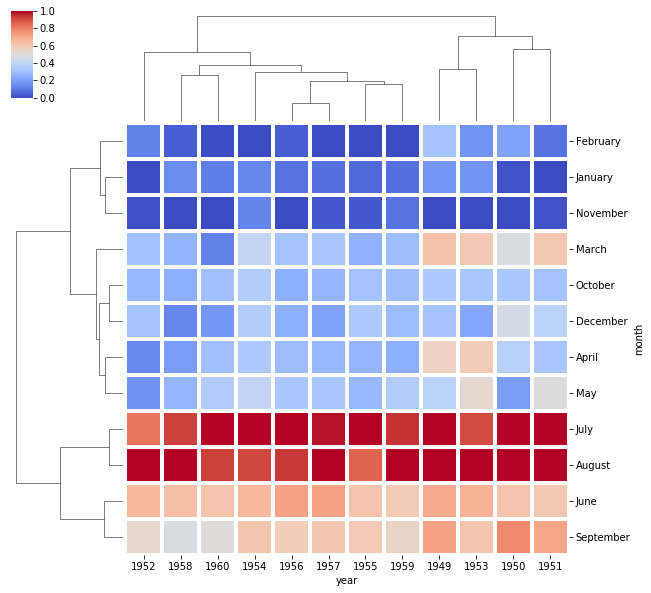

In [100]:
sns.clustermap(fp, cmap='coolwarm',linecolor='white',linewidths=3, standard_scale=1)

# Grids

In [103]:
iris = sns.load_dataset('iris')

In [104]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

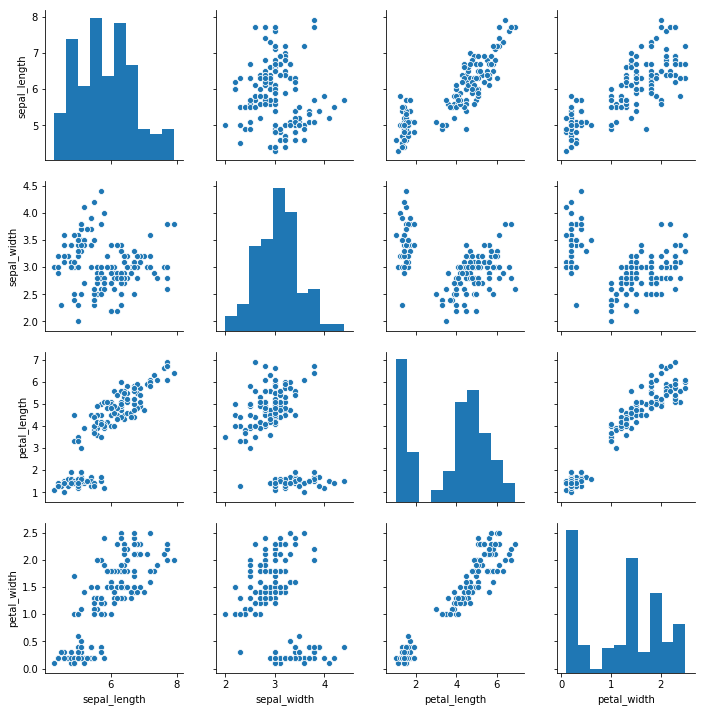

In [111]:
sns.pairplot(iris)

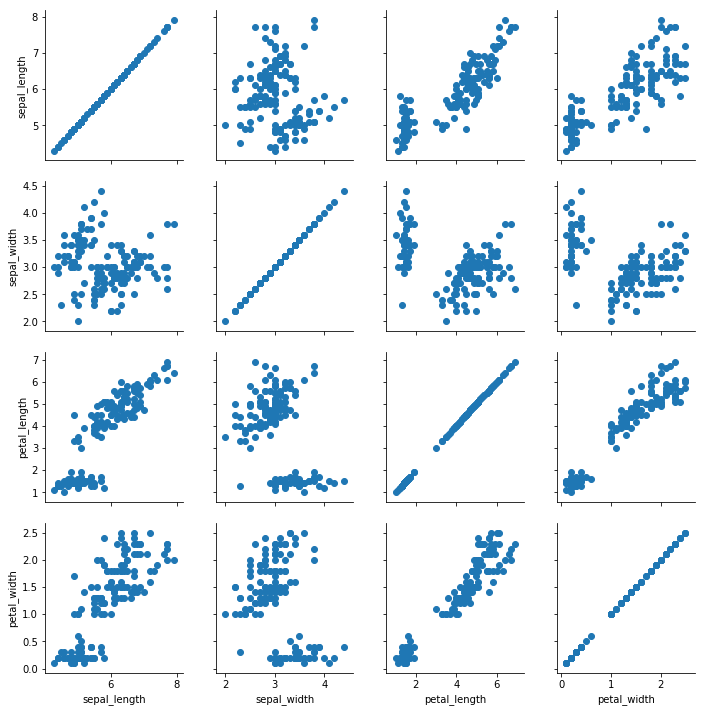

In [114]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


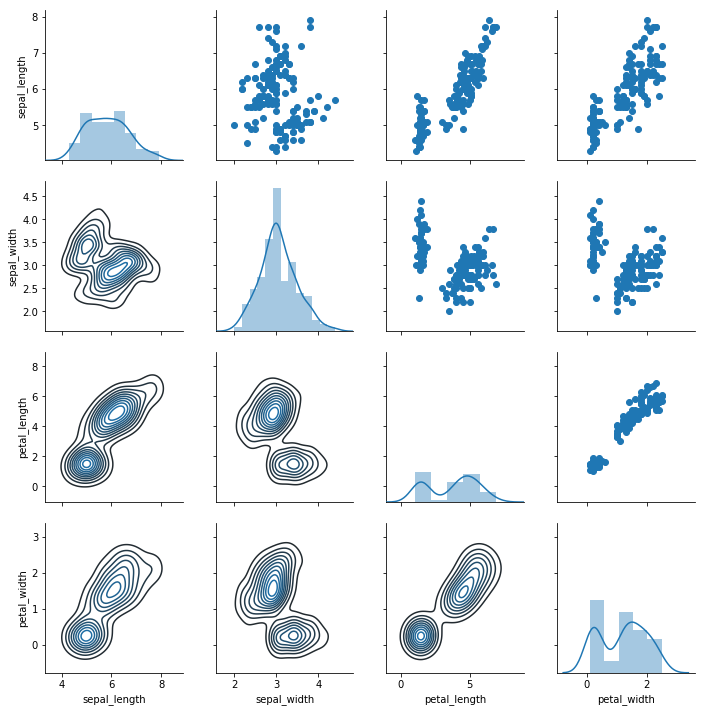

In [116]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [117]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


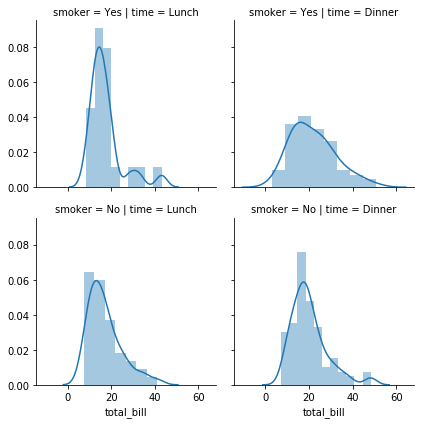

In [120]:
g = sns.FacetGrid(col='time',row='smoker', data=tips)
g.map(sns.distplot, 'total_bill')

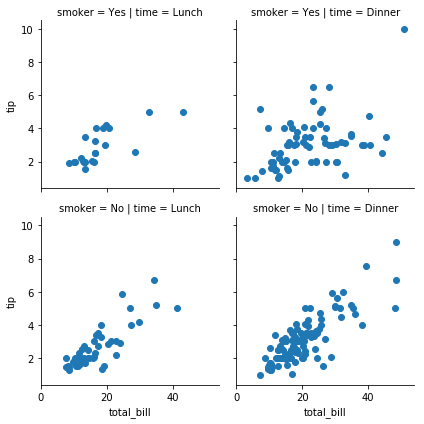

In [123]:
g = sns.FacetGrid(col='time',row='smoker', data=tips)
g.map(plt.scatter, 'total_bill', 'tip')

# Regression Plot

In [127]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


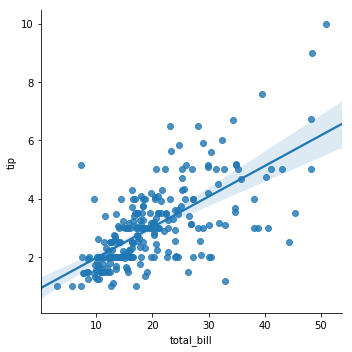

In [132]:
sns.lmplot(x='total_bill', y='tip', data=tips)

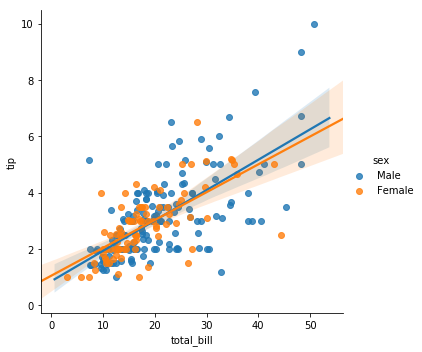

In [133]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

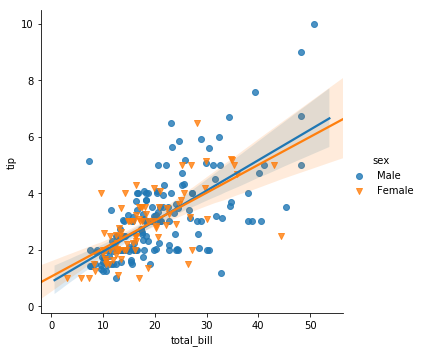

In [134]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'])

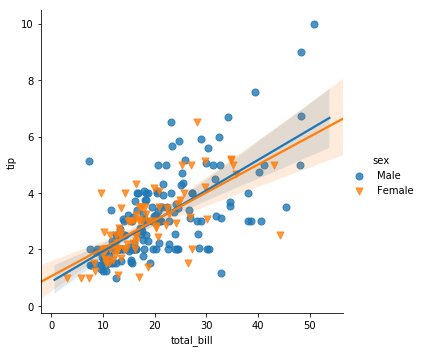

In [136]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'], scatter_kws={'s':50})

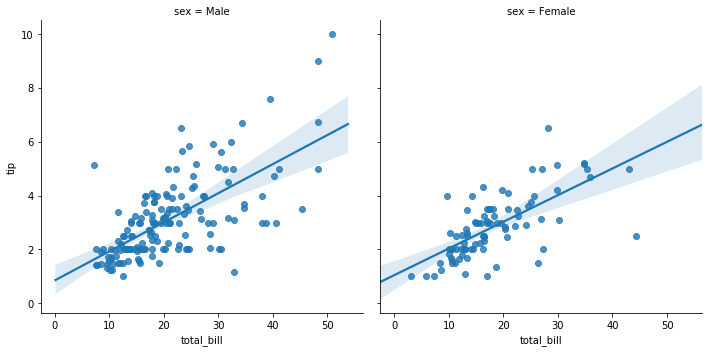

In [137]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


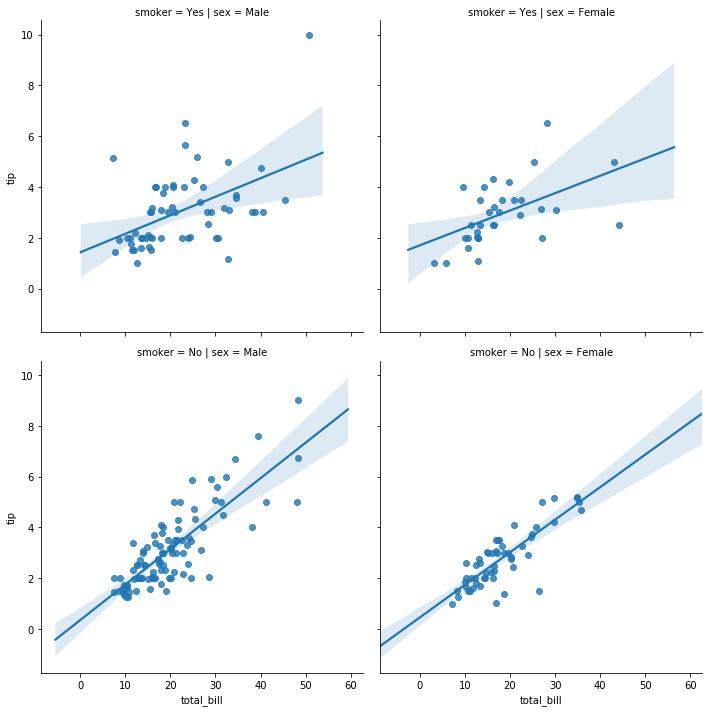

In [139]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='smoker')

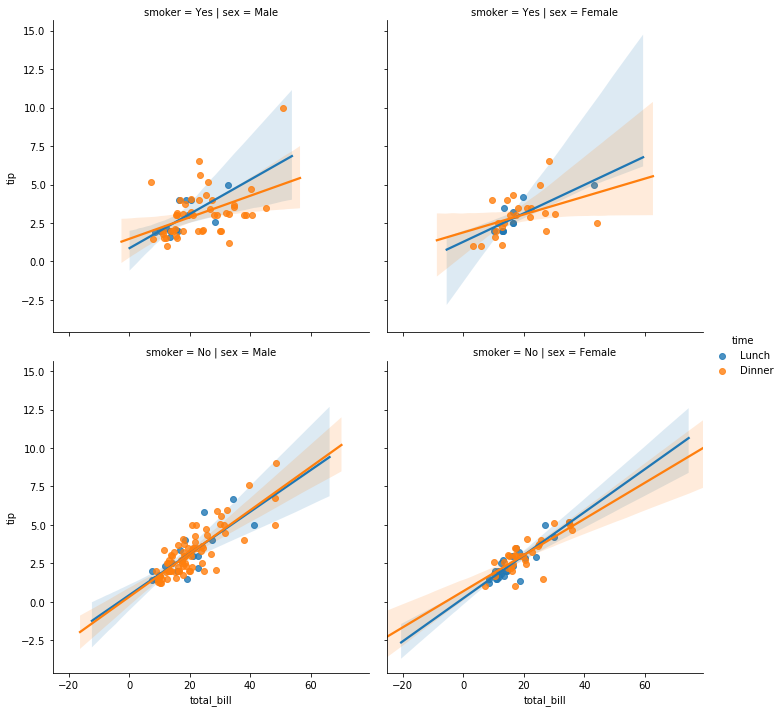

In [140]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='smoker', hue='time')

# Style & Colour

In [141]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


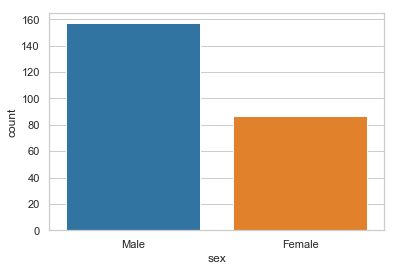

In [164]:
# sns.set_style('white') # ticks, whitegrid, darkgrid
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,3))
sns.set_context('notebook', font_scale=1) # notebook, paper, talk, poster
sns.despine(left=True)
sns.countplot(x='sex', data=tips)

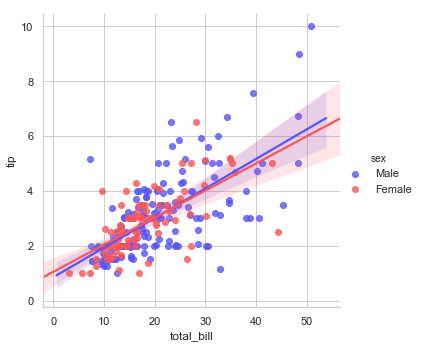

In [181]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', palette='seismic') # seismic, coolwarm, hsv, Accent, Dark2, RYG, summer, winter, hot, gray, pink, spring